# **Data Diri**

- **Nama:** Khamdan Annas Fakhryza
- **Email:** Khamdan@std.unissul.ac.id
- **ID Dicoding:** khamdan-fakhryza

Dataset ini diambil dari : https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

# Data Collection

In [80]:
# Mengimpor pustaka NumPy untuk operasi numerik dan array
import numpy as np
# Mengimpor pustaka matplotlib untuk visualisasi data (grafik/plot)
import matplotlib.pyplot as plt
# Mengimpor pustaka pandas untuk manipulasi dan analisis data (terutama tabel/CSV)
import pandas as pd
# Mengimpor seaborn untuk visualisasi statistik yang lebih menarik
import seaborn as sns

# Mengaktifkan mode inline agar grafik langsung ditampilkan di dalam Jupyter Notebook
%matplotlib inline


In [81]:
# Membaca file CSV yang berisi data sewa rumah dan menyimpannya ke dalam DataFrame bernama 'df'
df = pd.read_csv("/opt/notebooks/Membangun ML/Data_sewa rumah.csv")

# Menampilkan 5 baris pertama dari DataFrame untuk melihat struktur dan isi data
df.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# Data Understanding & Removing Outlier

In [82]:
# Menampilkan jumlah baris dan kolom dalam DataFrame 'df'
df.shape

(4746, 12)

In [83]:
# Menampilkan informasi umum tentang DataFrame, seperti jumlah non-null, tipe data, dan penggunaan memori
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [84]:
# Menghapus kolom 'Posted On' dan 'Point of Contact' dari DataFrame
# Alasan: kedua kolom ini dianggap tidak mempengaruhi harga sewa secara langsung (irrelevan untuk model prediksi)
df = df.drop(['Posted On', 'Point of Contact'], axis='columns')

## Univariate Analysis

In [85]:
# Mengelompokkan data berdasarkan kategori pada kolom 'Area Type',
# lalu menghitung jumlah entri (baris) untuk setiap jenis 'Area Type'
df.groupby('Area Type')['Area Type'].agg('count')


Area Type
Built Area        2
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

In [86]:
# Karena kategori 'Built Area' pada fitur 'Area Type' hanya memiliki 2 sampel,
# maka sampel tersebut akan dihapus agar tidak mempengaruhi model secara tidak proporsional

# Men-drop (menghapus) baris-baris di mana nilai 'Area Type' adalah 'Built Area'
df.drop(df.index[df['Area Type'] == 'Built Area'], inplace=True)

In [87]:
# Mengelompokkan data berdasarkan kategori pada kolom 'Area Type',
# lalu menghitung jumlah entri (baris) untuk setiap jenis 'Area Type'
df.groupby('Area Type')['Area Type'].agg('count')

Area Type
Carpet Area    2298
Super Area     2446
Name: Area Type, dtype: int64

In [88]:
# Mengelompokkan data berdasarkan kategori pada kolom 'City',
# lalu menghitung jumlah entri (baris) untuk setiap kota dalam kolom 'City'
df.groupby('City')['City'].agg('count')

City
Bangalore    886
Chennai      890
Delhi        605
Hyderabad    867
Kolkata      524
Mumbai       972
Name: City, dtype: int64

In [89]:
# Mengelompokkan data berdasarkan kategori pada kolom 'Furnishing Status',
# lalu menghitung jumlah entri (baris) untuk setiap jenis 'Furnishing Status'
df.groupby('Furnishing Status')['Furnishing Status'].agg('count')

Furnishing Status
Furnished          679
Semi-Furnished    2251
Unfurnished       1814
Name: Furnishing Status, dtype: int64

In [90]:
# Mengelompokkan data berdasarkan kategori pada kolom 'Tenant Preferred',
# lalu menghitung jumlah entri (baris) untuk setiap jenis preferensi penyewa
df.groupby('Tenant Preferred')['Tenant Preferred'].agg('count')

Tenant Preferred
Bachelors            830
Bachelors/Family    3442
Family               472
Name: Tenant Preferred, dtype: int64

In [91]:
# Mengelompokkan data berdasarkan kategori pada kolom 'Floor',
# lalu menghitung jumlah entri (baris) untuk setiap kategori 'Floor'
df.groupby('Floor')['Floor'].agg('count')

Floor
1                             2
1 out of 1                  134
1 out of 10                   4
1 out of 11                   1
1 out of 12                   2
                           ... 
Upper Basement out of 4       3
Upper Basement out of 40      1
Upper Basement out of 5       1
Upper Basement out of 7       2
Upper Basement out of 9       2
Name: Floor, Length: 480, dtype: int64

In [92]:
# Mengelompokkan data berdasarkan kategori pada kolom 'Area Locality',
# lalu menghitung jumlah entri (baris) untuk setiap kategori 'Area Locality'
df.groupby('Area Locality')['Area Locality'].agg('count')

Area Locality
 Beeramguda, Ramachandra Puram, NH 9     1
 in Boduppal, NH 2 2                     1
 in Erragadda, NH 9                      1
 in Miyapur, NH 9                        1
117 Residency, Chembur East              1
                                        ..
vanamali chs ghatla, Ghatla              1
venkatapuram                             1
venkatesa perumal nagar                  1
villvam towers tnhb colony               1
whitefield                              12
Name: Area Locality, Length: 2234, dtype: int64

In [15]:
# Fitur Floor dan Area Locality memiliki banyak sekali nilai unique sehingga akan di drop
df = df.drop(['Floor', 'Area Locality'], axis = 'columns')

In [93]:
# Menampilkan 5 baris pertama dari DataFrame df untuk melihat contoh data
df.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1


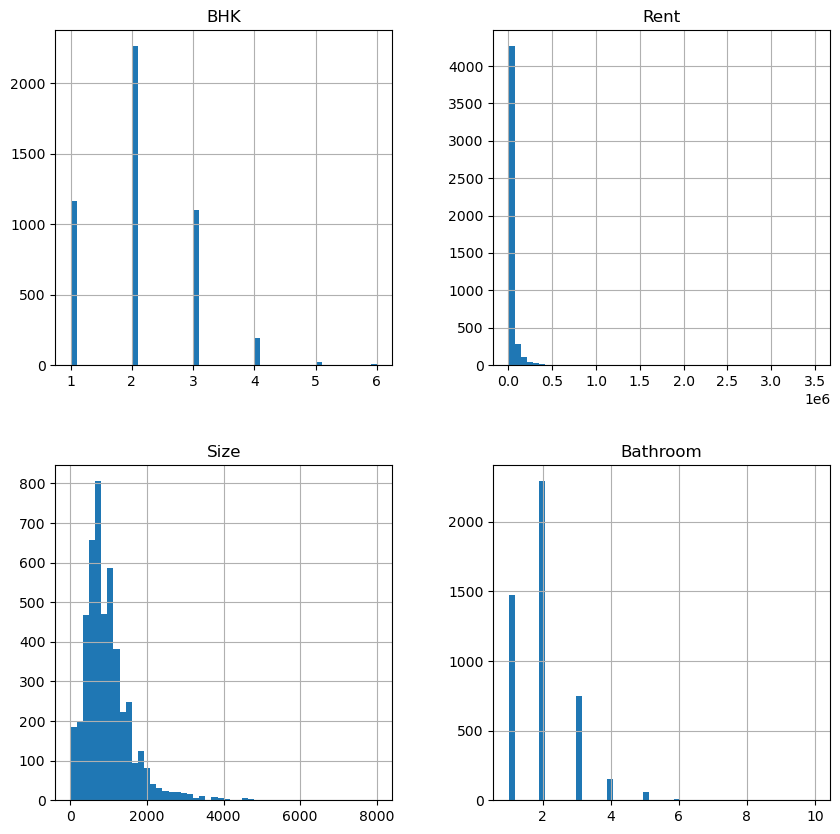

In [94]:
# Menampilkan histogram untuk setiap kolom numerik dalam DataFrame df
# Histogram ini akan menunjukkan distribusi nilai dari setiap fitur numerik
df.hist(bins=50, figsize=(10, 10))

# Menonaktifkan format offset pada label tick di sumbu x dan y
# serta menampilkan angka dalam format biasa (plain) tanpa notasi ilmiah
plt.ticklabel_format(useOffset=False, style='plain')

# Menampilkan grafik histogram
plt.show()


In [95]:
# Menampilkan statistik deskriptif untuk kolom 'Rent', 
# dan kemudian mengonversi setiap nilai statistik deskriptif menjadi format angka dengan desimal
df.Rent.describe().apply(lambda x: format(x, 'f'))

count       4744.000000
mean       35003.777403
std        78121.204493
min         1200.000000
25%        10000.000000
50%        16000.000000
75%        33000.000000
max      3500000.000000
Name: Rent, dtype: object

## Multivariate Analysis

In [19]:
# Menambahkan fitur baru price per sqft
df['Price_per_sqft'] = df['Rent']*1000/df['Size']

In [20]:
df.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


In [21]:
# Mendeteksi size per BHK outlier
# 100 sqft untuk 1 BHK itu tidak biasa sehingga anggap saja batasan tresholdnya 300 sqft/bhk

df[(df.Size/df.BHK) < 300].head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
7,1,5000,250,Super Area,Kolkata,Unfurnished,Bachelors,1,20000.000000
12,1,6500,250,Carpet Area,Kolkata,Furnished,Bachelors,1,26000.000000
21,2,9000,400,Carpet Area,Kolkata,Unfurnished,Bachelors,2,22500.000000
32,2,6000,550,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,10909.090909
33,2,5000,500,Carpet Area,Kolkata,Unfurnished,Bachelors/Family,2,10000.000000


In [22]:
df.shape

(4744, 9)

In [23]:
# Menghapus size per BHK outlier
df1 = df[~(df.Size/df.BHK < 300)]
df1.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,9090.909091
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,25000.000000
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,17000.000000
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,12500.000000
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,8823.529412


In [24]:
df1.shape

(4196, 9)

In [25]:
# Mendeteksi price per sqft outlier
df1.Price_per_sqft.describe().apply(lambda x: format(x, 'f'))

count       4196.000000
mean       32827.385605
std        41300.048982
min          571.428571
25%        13000.000000
50%        18511.595708
75%        34896.788991
max      1400000.000000
Name: Price_per_sqft, dtype: object

Harga 571 per sqft sangat rendah dan harga 1400000 per sqft sangat tinggi

In [26]:
# Menghapus price per sqft outlier dengan mean dan one standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('City'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df2 = remove_pps_outliers(df1)
df2.shape

(3699, 9)

In [27]:
# Mendeteksi bathroom outlier
# 2 BHK dengan 4 kamar mandi itu tidak biasa jadi anggap saja batasnya kamar mandi tidak boleh melebihi jumlah BHK + 2

df2[df2.Bathroom > df2.BHK + 2]

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
860,3,20000,1700,Carpet Area,Chennai,Furnished,Bachelors/Family,6,11764.705882
1904,4,150000,4000,Carpet Area,Delhi,Semi-Furnished,Bachelors,7,37500.000000
3328,1,40000,680,Super Area,Mumbai,Furnished,Bachelors/Family,4,58823.529412


In [28]:
# Menghapus bathroom outlier
df2 = df2[~(df2.Bathroom > df2.BHK + 2)]
df2.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft
0,3,70000,3354,Carpet Area,Bangalore,Furnished,Bachelors/Family,3,20870.602266
1,2,10500,800,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,13125.000000
2,2,13000,1000,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,13000.000000
3,2,17000,1040,Super Area,Bangalore,Furnished,Bachelors/Family,2,16346.153846
4,3,21000,1403,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,3,14967.925873


In [29]:
df2.shape

(3696, 9)

In [30]:
# Menghilangkan fitur price per sqft karena sudah tidak terpakai
df3 = df2.drop(['Price_per_sqft'], axis = 'columns')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

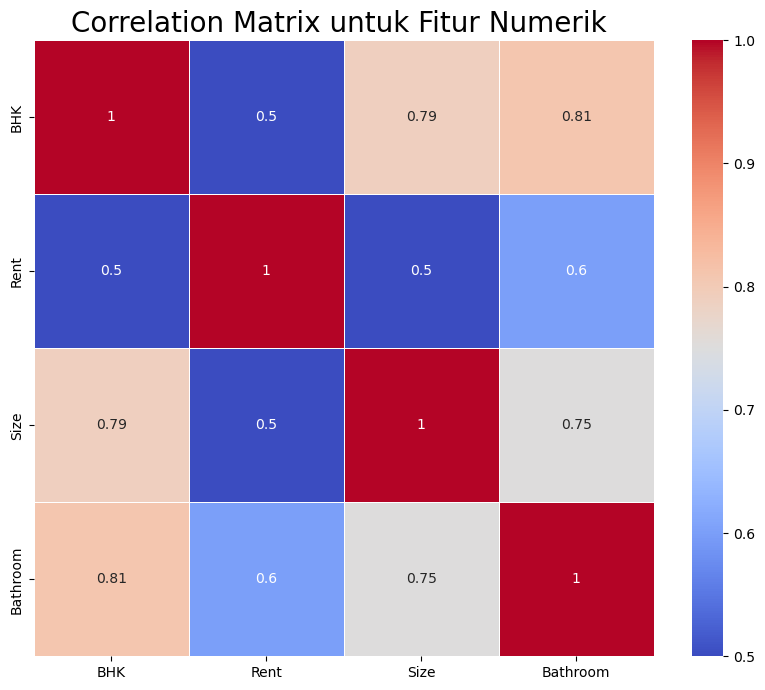

In [52]:
# Melihat kolerasi antara fitur numerik dengan fitur target (harga)
plt.figure(figsize=(10, 8))
correlation_matrix = df3.select_dtypes(include='number').corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

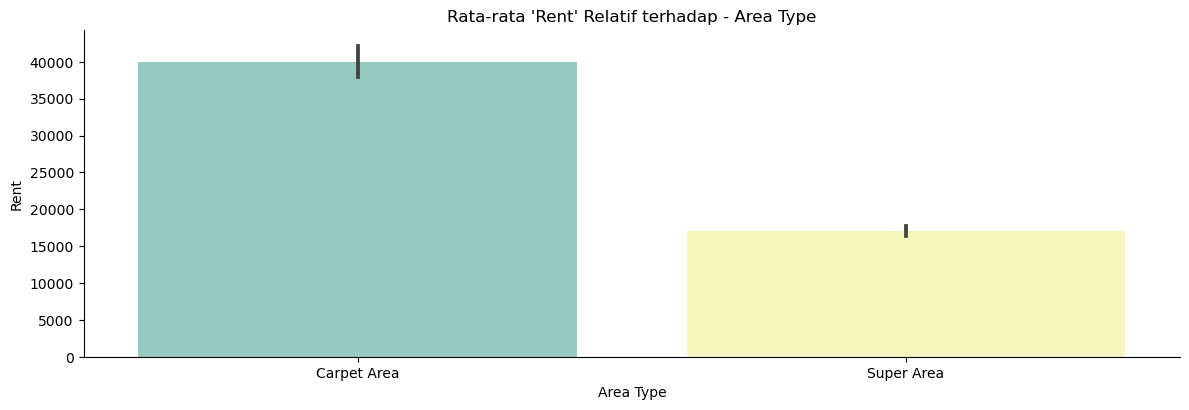

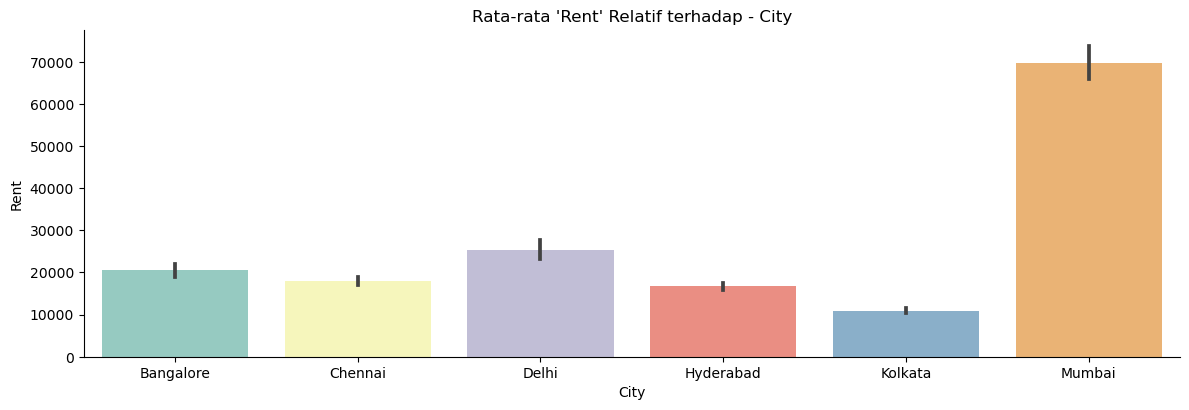

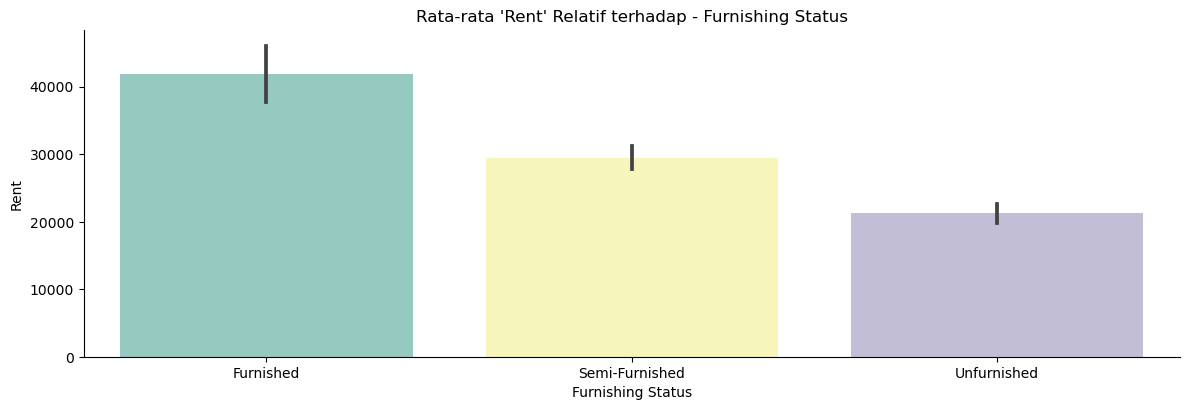

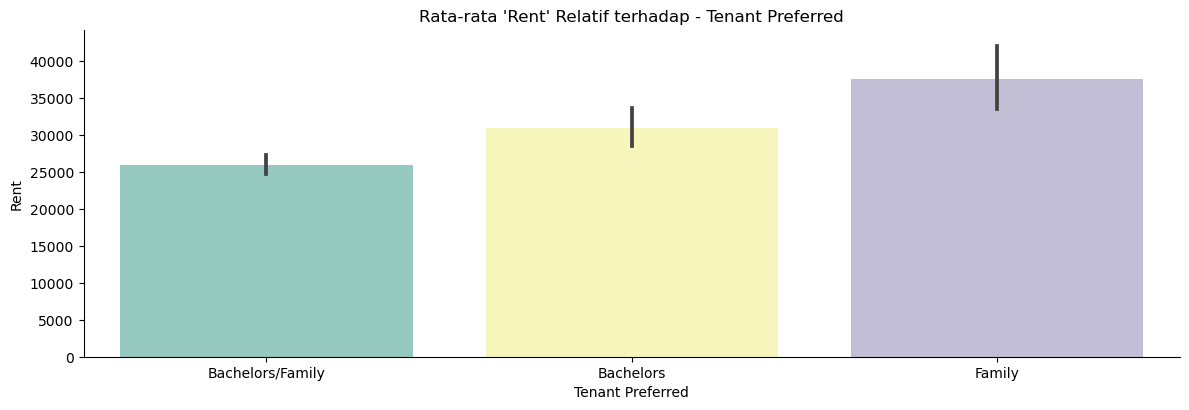

In [55]:
# Melihat kolerasi antara fitur kategorik dengan fitur target (harga)
import warnings
warnings.filterwarnings("ignore")

cat_features = df2.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="Rent", kind="bar", dodge=False, height = 4, aspect = 3,  data=df2, palette="Set3")
  plt.title("Rata-rata 'Rent' Relatif terhadap - {}".format(col))

# Data Preparation

## One hot encoding

In [60]:
pd.get_dummies(df, columns=['City'], drop_first=True)


,BHK,Rent,Size,Area Type,Furnishing Status,Tenant Preferred,Bathroom,Price_per_sqft,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai
0,2,10000,1100,Super Area,Unfurnished,Bachelors/Family,2,9090.909091,False,False,False,True,False
1,2,20000,800,Super Area,Semi-Furnished,Bachelors/Family,1,25000.000000,False,False,False,True,False
2,2,17000,1000,Super Area,Semi-Furnished,Bachelors/Family,1,17000.000000,False,False,False,True,False
3,2,10000,800,Super Area,Unfurnished,Bachelors/Family,1,12500.000000,False,False,False,True,False
4,2,7500,850,Carpet Area,Unfurnished,Bachelors,1,8823.529412,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Semi-Furnished,Bachelors/Family,2,15000.000000,False,False,True,False,False
4742,3,29000,2000,Super Area,Semi-Furnished,Bachelors/Family,3,14500.000000,False,False,True,False,False
4743,3,35000,1750,Carpet Area,Semi-Furnished,Bachelors/Family,3,20000.000000,False,False,True,False,False
4744,3,45000,1500,Carpet Area,Semi-Furnished,Family,2,30000.000000,False,False,True,False,False


In [61]:
df3.head()

,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family
0,3,70000,3354,3,True,False,True,False,False,False,False,False,True,False,False,False,True,False
1,2,10500,800,2,False,True,True,False,False,False,False,False,False,True,False,False,True,False
2,2,13000,1000,2,False,True,True,False,False,False,False,False,False,True,False,False,True,False
3,2,17000,1040,2,False,True,True,False,False,False,False,False,True,False,False,False,True,False
4,3,21000,1403,3,False,True,True,False,False,False,False,False,False,True,False,False,True,False


## Train Test Split

In [62]:
from sklearn.model_selection import train_test_split
 
X = df3.drop(["Rent"],axis =1)
y = df3["Rent"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=123)

In [63]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 3696
Total # of sample in train dataset: 3511
Total # of sample in test dataset: 185


## Normalization

In [64]:
from sklearn.preprocessing import StandardScaler

# Normalisasi data train
numerical_features = ['BHK', 'Size', 'Bathroom']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,BHK,Size,Bathroom
1865,1.186385,0.454836,0.053982
439,-0.071283,-0.376100,0.053982
823,-0.071283,1.470424,0.053982
3463,-0.071283,-0.560752,0.053982
1519,-0.071283,0.194476,0.053982


In [65]:
# Normalisasi data test
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

# Modeling

## Grid Search

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def grid_search_model(X,y):
    algos = {
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            }
        },
        'boosting': {
            'model': AdaBoostRegressor(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 75, 100],
                'random_state': [11, 33, 55, 77]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [8, 16, 32, 64],
                'random_state': [11, 33, 55, 77],
            }
        }
        
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.05, random_state=123)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

grid_search_model(X,y)

,model,best_score,best_params
0,knn,0.460230,{'n_neighbors': 7}
1,boosting,0.856539,"{'learning_rate': 0.1, 'n_estimators': 100, 'r..."
2,random_forest,0.893655,"{'max_depth': 8, 'n_estimators': 25, 'random_s..."


## Model with best parameter

In [68]:
acc = pd.DataFrame(index=['accuracy'])

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(X_train, y_train)
acc.loc['accuracy', 'knn'] = knn.score(X_test,y_test)
knn.score(X_test,y_test)

0.7238397713049399

In [71]:
rf = RandomForestRegressor(n_estimators = 50, max_depth = 8, random_state = 11)
rf.fit(X_train, y_train)
acc.loc['accuracy', 'rf'] = rf.score(X_test,y_test)
rf.score(X_test,y_test)

0.9320574970694799

In [72]:
boosting = AdaBoostRegressor(n_estimators = 25, learning_rate = 0.001, random_state = 11)                             
boosting.fit(X_train, y_train)
acc.loc['accuracy', 'boosting'] = boosting.score(X_test,y_test)
boosting.score(X_test,y_test)

0.8985561811074477

# Evaluation

In [73]:
# Akurasi dari model
acc

,knn,rf,boosting
accuracy,0.72384,0.932057,0.898556


In [74]:
# Mean squared error dari model
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,156214.077019,663652.767095
RF,63498.211157,163275.610997
Boosting,171831.281366,243784.09386


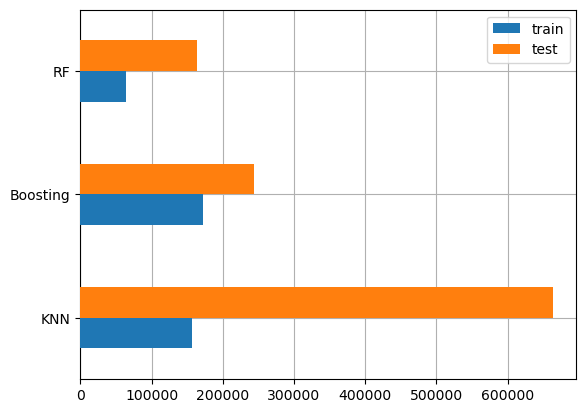

In [75]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [76]:
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1733,11000,11071.4,10913.1,13168.5
1442,13000,12071.4,13297.7,13168.5
1911,18000,21571.4,22240.4,13517.4
2003,22000,23428.6,17893.1,18242.7
553,11000,16214.3,11114.7,13168.5
